# Underfitting and Overfitting in KNN

## Importing libraries

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
#Reading a csv file
df = pd.read_csv('titanic_cleaned.csv')

In [3]:
#Dimension of the dataframe
df.shape

(891, 25)

In [4]:
#First 10 rows of the dataframe
df.head(10)

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.000000,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.000000,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.000000,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.000000,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
5,0,29.699118,8.4583,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
6,0,54.000000,51.8625,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
7,0,2.000000,21.0750,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
8,1,27.000000,11.1333,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
9,1,14.000000,30.0708,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [5]:
#Data type of all columns
df.dtypes

Survived        int64
Age           float64
Fare          float64
Pclass_1        int64
Pclass_2        int64
Pclass_3        int64
Sex_female      int64
Sex_male        int64
SibSp_0         int64
SibSp_1         int64
SibSp_2         int64
SibSp_3         int64
SibSp_4         int64
SibSp_5         int64
SibSp_8         int64
Parch_0         int64
Parch_1         int64
Parch_2         int64
Parch_3         int64
Parch_4         int64
Parch_5         int64
Parch_6         int64
Embarked_C      int64
Embarked_Q      int64
Embarked_S      int64
dtype: object

In [6]:
#Checking for a missing values
df.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

## Segragating Variables - Independent and Dependent variables

In [7]:
#Seperating Dependent and Independent variables
X = df.drop(['Survived'], axis=1)
y = df['Survived']

## Scaling the data

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [9]:
#First 10 rows after scaling
X.head(10)

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,-0.592481,-0.502445,-0.565685,-0.510152,0.902587,-0.737695,0.737695,-1.465746,1.806421,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,-0.307562,0.615838
1,0.638789,0.786845,1.767767,-0.510152,-1.107926,1.355574,-1.355574,-1.465746,1.806421,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,2.074505,-0.307562,-1.623803
2,-0.284663,-0.488854,-0.565685,-0.510152,0.902587,1.355574,-1.355574,0.682247,-0.553581,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,-0.307562,0.615838
3,0.407926,0.420730,1.767767,-0.510152,-1.107926,1.355574,-1.355574,-1.465746,1.806421,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,-0.307562,0.615838
4,0.407926,-0.486337,-0.565685,-0.510152,0.902587,-0.737695,0.737695,0.682247,-0.553581,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,-0.307562,0.615838
5,0.000000,-0.478116,-0.565685,-0.510152,0.902587,-0.737695,0.737695,0.682247,-0.553581,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,3.251373,-1.623803
6,1.870059,0.395814,1.767767,-0.510152,-1.107926,-0.737695,0.737695,0.682247,-0.553581,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,-0.307562,0.615838
7,-2.131568,-0.224083,-0.565685,-0.510152,0.902587,-0.737695,0.737695,-1.465746,-0.553581,-0.180125,...,-1.784124,2.559462,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,-0.307562,0.615838
8,-0.207709,-0.424256,-0.565685,-0.510152,0.902587,1.355574,-1.355574,0.682247,-0.553581,-0.180125,...,-1.784124,-0.390707,3.183944,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,-0.307562,0.615838
9,-1.208115,-0.042956,-0.565685,1.960202,-1.107926,1.355574,-1.355574,-1.465746,1.806421,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,2.074505,-0.307562,-1.623803


## Splitting the data into Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

<img src="Image 2.png" alt="Drawing" style="width: 600px;"/>

## Implement KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
#Creating an instance of KNN
knn = KNeighborsClassifier(n_neighbors=3)

In [13]:
#Fitting the model to the train data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Make Predictions

In [14]:
#Making predictions over train set
train_pred = knn.predict(X_train)

In [15]:
#Making predictions over test set
test_pred = knn.predict(X_test)

## Evaluate the model

In [16]:
from sklearn.metrics import f1_score

In [17]:
#Calculating f1 score for train set and test set
print("Train F1 Score : ", f1_score(y_train, train_pred))
print("Test F1 Score : ", f1_score(y_test, test_pred))

Train F1 Score :  0.8197343453510436
Test F1 Score :  0.6666666666666667


We can see that our model performs well on train data but doesn't perform well on test data. So our model is overfitting.

In [18]:
#Evaluate the model and calculate f1 score for training set and test set for different values of k
def F1_Score(K):
    '''
  Takes an input K consisting of a range of K values for KNN
  Input:
  K = list
  
  Returns: lists containing F1 corresponding to every value of K
  train_f1 = list of train f1 score corresponding K
  test_f1  = list of test f1 score corresponding to K
    '''
    #Create an empty lists
    train_f1 = []
    test_f1 = []
    
    #Train a model for every value of K
    for i in K:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        #Appending F1 Score to the empty lists
        temp = knn.predict(X_train)
        temp = f1_score(y_train, temp)
        train_f1.append(temp)
        
        temp = knn.predict(X_test)
        temp = f1_score(y_test, temp)
        test_f1.append(temp)
    return train_f1, test_f1

In [19]:
#Defining K range 
k = range(1, 150)

In [20]:
#Calling above function
train_f1, test_f1 = F1_Score(k)

In [21]:
score = pd.DataFrame({'Train_Score' : train_f1, 'Test_Score' : test_f1}, index=k)
score

,Train_Score,Test_Score
1,0.976321,0.643357
2,0.794702,0.563636
3,0.819734,0.666667
4,0.766667,0.631579
5,0.782443,0.661417
...,...,...
145,0.553616,0.549020
146,0.553616,0.549020
147,0.553616,0.549020
148,0.555000,0.549020


## Visualizing

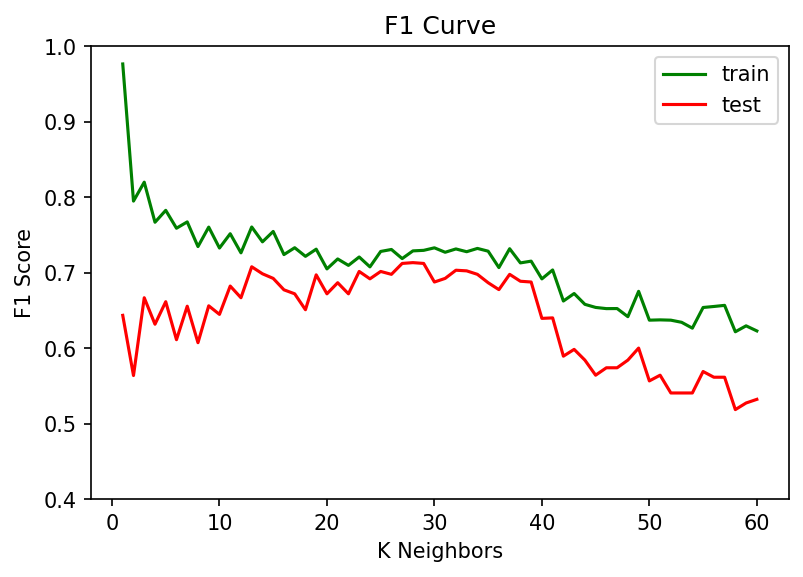

In [22]:
#Plotting the curve
plt.figure(figsize=(6, 4), dpi=150)
plt.plot(k[0:60], train_f1[0:60], color='green', label='train')
plt.plot(k[0:60], test_f1[0:60], color='red', label='test')
plt.xlabel('K Neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Curve')
plt.ylim(0.4, 1)
plt.legend()
plt.show()

<img src="Image 2 a.png" alt="Drawing" style="width: 600px;" style="height:800px;" align = "center">